<a href="https://colab.research.google.com/github/lucasjsbarbosa/Challenge-Data-Science-Alura/blob/main/Challenge_1_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB, GaussianNB, ComplementNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'

In [ ]:
df = pd.read_json(uri)

In [ ]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)

df = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)



In [ ]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [ ]:
rows_with_empty_strings = df.applymap(lambda x: x == "").any(axis=1)
count_empty_strings = rows_with_empty_strings.sum()

In [ ]:
print(f"Existem {count_empty_strings} linhas com strings vazias no DataFrame.")

Existem 224 linhas com strings vazias no DataFrame.


In [ ]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'],errors='coerce')

In [ ]:
df['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [ ]:
df['Charges.Day'] = df['Charges.Monthly'] / 30

In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Day
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [ ]:
df = df[df['Churn'] != '']

In [ ]:
df = df.fillna(0)

In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
map = {
    'Yes' : 1,
    'No' : 0
    }
df.Churn = df.Churn.map(map)

<Axes: xlabel='gender', ylabel='Churn'>

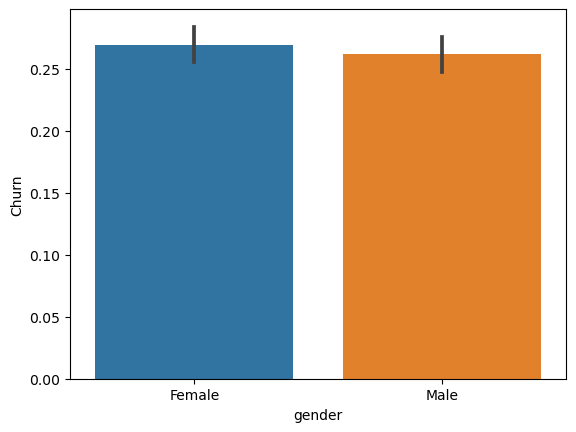

In [ ]:
sns.barplot(data=df, x='gender', y='Churn')

In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Charges.Day'],
      dtype='object')

### Pré-processamento

In [ ]:
columns_to_encode = df.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]

In [ ]:
df = pd.get_dummies(df, columns=columns_to_encode)

In [ ]:
X = df.drop(['customerID','Churn'], axis=1)

In [ ]:
X = X.values

In [ ]:
np.unique(X)

array([False, 0.6083333333333333, 0.6133333333333333, ..., 8670.1,
       8672.45, 8684.8], dtype=object)

In [ ]:
y = df['Churn']

In [ ]:
y = y.values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
X.shape, y.shape

((7043, 1703), (7043,))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

## Machine Learning

### **SVC**

In [ ]:
modelo = SVC(kernel='linear',random_state=42)
modelo.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
print('- Matriz de Confusão (SVC)')
print(confusion_matrix(y_test, modelo.predict(X_test)))
print('\n- Reporte teste (Naive SVC)')
print(classification_report(y_test, modelo.predict(X_test)))

- Matriz de Confusão (SVC)
[[1329  233]
 [ 238  313]]

- Reporte teste (Naive SVC)
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1562
           1       0.57      0.57      0.57       551

    accuracy                           0.78      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.78      0.78      0.78      2113



In [ ]:
modelo = SVC(kernel='linear',random_state=42)
pipeline = make_pipeline(NearMiss(version=3), SMOTE(), modelo)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_SVC = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [ ]:
recall_scores_svc = cv_results_SVC['test_score']

In [ ]:
mean_recall = np.mean(recall_scores_svc)
std_recall = np.std(recall_scores_svc)

print(f"Recall médio: {mean_recall:.2f}")
print(f"Intervalo de confiança: {mean_recall - 2 * std_recall:.2f} - {mean_recall + 2 * std_recall:.2f}")

Recall médio: 0.72
Intervalo de confiança: 0.70 - 0.74


### **Naive Bayes**

In [ ]:
naive = GaussianNB()
naive.fit(X_train,y_train)

In [ ]:
print('- Matriz de Confusão (Naive Bayes)')
print(confusion_matrix(y_test, naive.predict(X_test)))
print('\n- Reporte teste (Naive Bayes)')
print(classification_report(y_test, naive.predict(X_test)))

### **Random Forest**

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print('- Matriz de Confusão (Random Forest)')
print(confusion_matrix(y_test, random_forest.predict(X_test)))
print('\n- Reporte teste (Random Forest)')
print(classification_report(y_test, random_forest.predict(X_test)))

- Matriz de Confusão (Random Forest)
[[1429  133]
 [ 291  260]]

- Reporte teste (Random Forest)
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1562
           1       0.66      0.47      0.55       551

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
random_forest = RandomForestClassifier(max_depth=10, random_state=42)
pipeline = imbpipeline([('undersample', NearMiss(version= 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring='recall')

In [ ]:
recall_scores = cv_resultados['test_score']

In [ ]:
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)

print(f"Recall médio: {mean_recall:.2f}")
print(f"Intervalo de confiança: {mean_recall - 2 * std_recall:.2f} - {mean_recall + 2 * std_recall:.2f}")

Recall médio: 0.78
Intervalo de confiança: 0.75 - 0.82


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel


param_grid = {
    'rf__n_estimators': [100, 300, 500],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]

pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

modelo = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv= skf)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(random_state=42))),
                                       ('undersample',
                                        RandomUnderSampler(random_state=42)),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__max_depth': [None, 5, 10, 20],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 300, 500]})

In [ ]:
print('- Matriz de Confusão (Random Forest)')
print(confusion_matrix(y_test, grid_search.predict(X_test)))
print('\n- Reporte teste (Random Forest)')
print(classification_report(y_test, grid_search.predict(X_test)))

- Matriz de Confusão (Random Forest)
[[1116  446]
 [ 107  444]]

- Reporte teste (Random Forest)
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1562
           1       0.50      0.81      0.62       551

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113



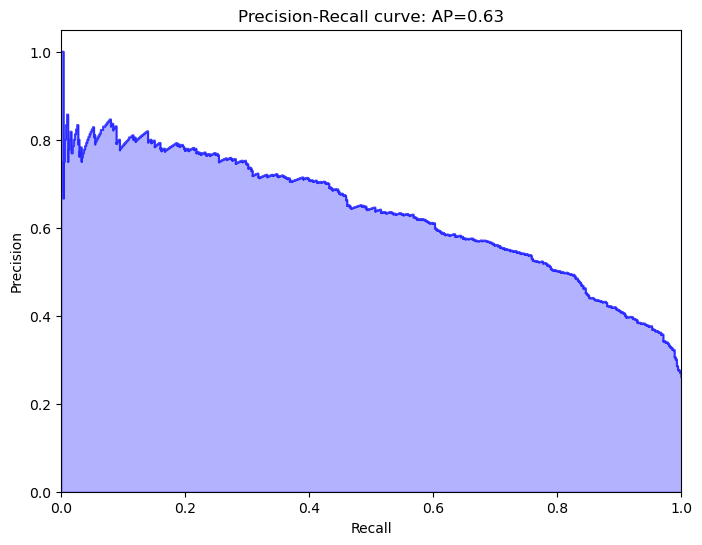

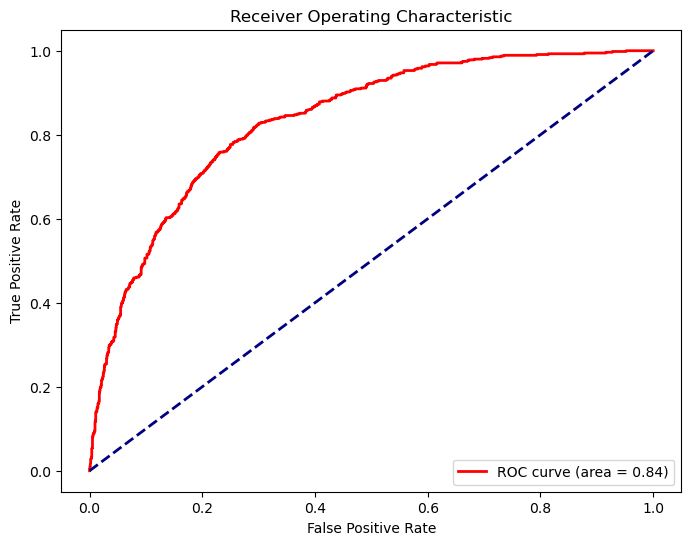

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt


best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = auc(recall, precision)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
